In [27]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3,3]

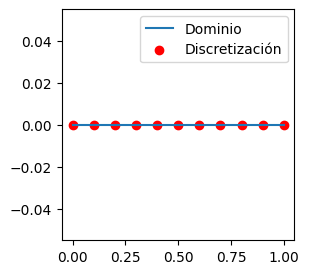

In [28]:
# N intervalos y de puntos
Nint = 10
Nvec = Nint+1

# Dominio
xs = np.linspace(0,1,Nvec)
h = 1/Nint # Ancho de malla

plt.plot((0,1), (0,0),label="Dominio")
plt.scatter(xs, np.zeros(Nvec), label="Discretización", color="red")
plt.legend()
plt.show()

In [29]:
# Inicialización de lhs, rhs
A = np.zeros((Nvec, Nvec))
b = np.zeros(Nvec)

# lado derecho
def f(x): 
    return 1 # np.sin(x)

# Solución para f=1
def sol(x):
    return 0.5 * x * (1-x)

In [30]:
for k in range(1, Nvec-1):
    A[k, k-1] = -1 / h**2
    A[k,k] = 2 / h**2
    A[k, k+1] = -1 / h**2
    b[k] = f(xs[k])

# Condiciones de borde
A[0,0] = 1
b[0] = 0
A[Nvec-1, Nvec-1] = 1
b[Nvec-1] = 0

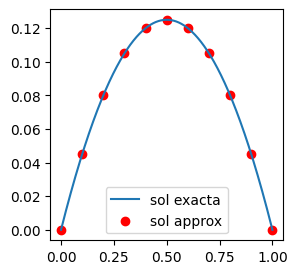

In [31]:
u = solve(A, b) # np.linalg.solve
xfine = np.linspace(0,1,1000)
plt.plot(xfine, sol(xfine), label="sol exacta")
plt.scatter(xs, u, label="sol approx", color="red")
plt.legend()
plt.show()

In [32]:
# Ahora con sistema reducido
Ared = A[1:Nvec-1, 1:Nvec-1]
print(A.shape, Ared.shape)
bred = b[1:Nvec-1]
ured = solve(Ared, bred)

# Hay que extenderlo de vuelta
uext = np.zeros(Nvec)
uext[1:Nvec-1] = ured # uext == u!

(11, 11) (9, 9)


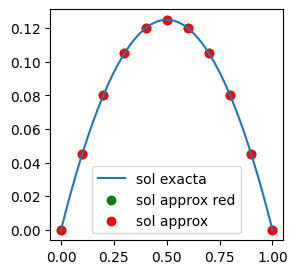

917.0414622580015 39.86345818906149


In [33]:
plt.plot(xfine, sol(xfine), label="sol exacta")
plt.scatter(xs, uext, label="sol approx red", color="green")
plt.scatter(xs, u, label="sol approx", color="red")
plt.legend()
plt.show()
from numpy.linalg import cond
print(cond(A), cond(Ared)) # o.o!